# Figure 2

## Imports and colour scheme

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


## Import plots

In [2]:
%%capture
%run fig_2_maps_plot.ipynb
%run fig_2_z_loeuf_plot.ipynb
%run fig_2_oe_plots.ipynb
%run fig_2_z_dist_plots.ipynb

In [3]:
# Get upset plot image file
upset = plt.imread("../plots/constraint_in_regions_upset_plot.png")

## Figure construction

In [4]:
cm = 1 / 2.54  # cm to inches convertes

In [5]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=10):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

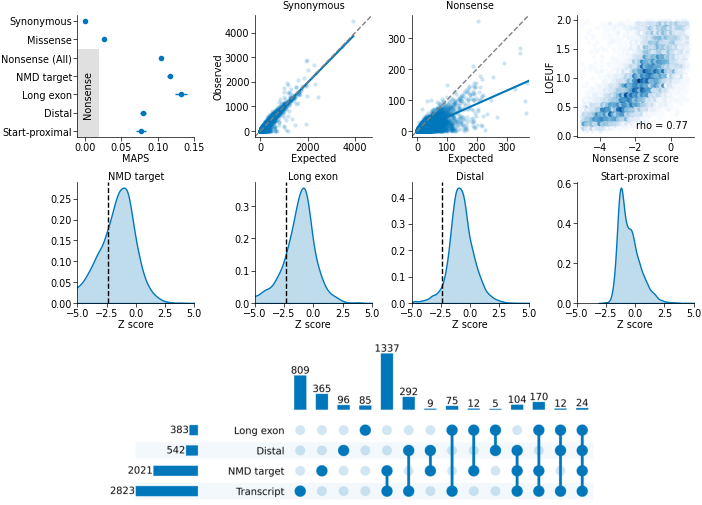

In [7]:
fig = plt.figure(figsize=(18 * cm, 13 * cm), layout=("constrained"))

subfigs = fig.subfigures(2, 1, height_ratios=[2, 1])

axs_top = subfigs[0].subplots(2, 4)
ax_bottom = subfigs[1].subplots(1,1)  # .subplots(1, 2, width_ratios=[3,1])

ax_maps = axs_top[0][0]
ax_oe_syn = axs_top[0][1]
ax_oe_non = axs_top[0][2]
ax_z_loeuf = axs_top[0][3]

ax_z_nmd = axs_top[1][0]
ax_z_long = axs_top[1][1]
ax_z_distal = axs_top[1][2]
ax_z_start = axs_top[1][3]

ax_bottom.imshow(upset)
ax_bottom.axis("off")


plot_maps(maps, ax_maps)
plot_z_loeuf(z_loeuf, ax_z_loeuf)
plot_oe(oe, ax_oe_syn, csq="synonymous", ylabel="Observed")
plot_oe(oe, ax_oe_non, csq="nonsense")
plot_z_dist(z_dist, ax_z_nmd, region="nmd_target", title="NMD target")
plot_z_dist(z_dist, ax_z_long, region="long_exon", title="Long exon")
plot_z_dist(z_dist, ax_z_distal, region="distal_nmd", title="Distal")
plot_z_dist(
    z_dist,
    ax_z_start,
    region="start_proximal",
    title="Start-proximal",
    FDR_line=False,
    FDR_label=False,
)

plt.savefig("../plots/figure_02.svg", format="svg")
plt.savefig("../plots/figure_02.png", format="png", dpi=1000)